# 로지스틱 회귀

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

# 4장의 시나리오 
* 럭키백은 구성품을 모른 채 먼저 구매하고, 배송받은 다음에야 비로소 구성품을 알 수 있는 상품입니다. 
* 기간 한정으로 판매하는 럭키백의 물품은 생선으로 한정하기로 했습니다. 
* 어쩔수 없이 마케팅 팀은 럭키백에 포함된 생선의 확률을 알려주는 방향으로 이벤트를 진행하고 있습니다. 
* 가령 A 럭키백에 도미 확률이 높다고 표시하면 도미를 원하는 고객은 A 럭키백을 구매할 것입니다. 

## 럭키백의 확률
* 럭키백에 들어갈 수 있는 생선은 7개 입니다. 
* 럭키백에 들어갈 생선의 크기, 무게 등이 주어졌을 때 7개 생선에 대한 확률을 출력해야 합니다. 
* 이번에는 길이, 높이, 두께 외에도 대각선 길이와 무게도 사용할 수 있습니다. 
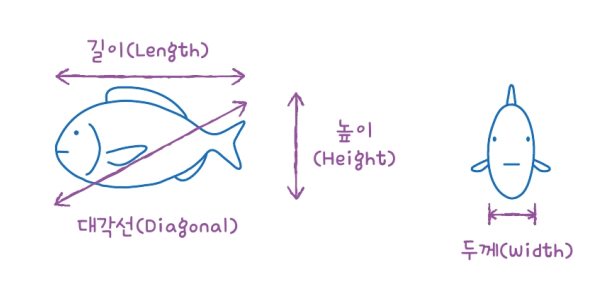

* K-NN을 사용하여 이웃의 클래스 비율을 확률이라고 출력하면 되지 않을까?
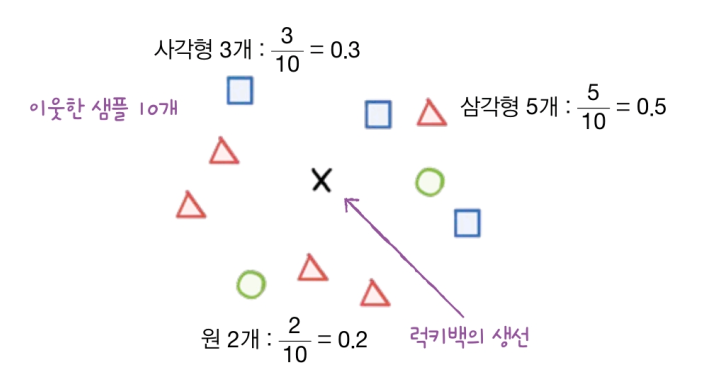

* 사각형이 3개, 삼각형이 5개, 원이 2개입니다. 이웃한 샘플의 클래스를 확률로 삼는다면 샘플 X가 사각형일 확률은 30%, 삼각형일 확률은 50%, 원일 확류은 20%입니다. 

### 데이터 준비하기

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


* 타깃 데이터에는 7개의 생선의 종류가 들어 있습니다. 타깃이 2개 이상의 클래스가 포함된 문제를 다중 분류(multi class claasification)이라고 부릅니다. 

In [3]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [4]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [5]:
fish_target = fish['Species'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### k-최근접 이웃 분류기의 확률 예측
* 사이킷런에서는 편리하게도 문자열로 된 타깃값을 그대로 사용할 수 있습니다. 

In [9]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [10]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [11]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


* predict_proba() 메서드로 클래스별 확률값을 확인할 수 있습니다. 테스트 세트에 있는 처음 5개의 샘플에 대한 확률을 출력해보겠습니다. 

In [12]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
# decimal은 소수점 이하 자리수를 의미 
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


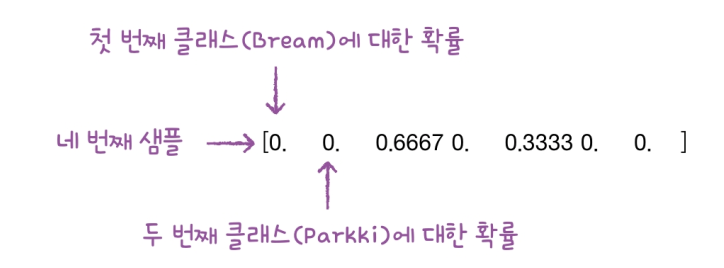

* 4번째 값의 최근접 이웃의 클래스를 출력해보겠습니다. 
* 참고 : 2차원으로 데이터를 넘기기 위해서 3:4 슬라이싱을 사용했음

In [17]:
test_scaled[3:4]

array([[-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464]])

In [16]:
test_scaled[3:4].ndim

2

In [14]:
test_scaled[3]

array([-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464])

In [15]:
test_scaled[3].ndim

1

In [19]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
# 슬라이싱 한 이유 : 2차원 데이터로 받으려고. 그래야 데이터가 들어감
# 1차원이면 에러남 차원이 맞지 않아서. 그래서 슬라이싱 써서 차원을 높여줌
print(train_target[indexes])
# 3개의 생선이 근처에 있었다.

[['Roach' 'Perch' 'Perch']]


## 로지스틱 회귀
* 로지스틱 회귀(logistic regression)는 이름은 회귀지만 분류 모델입니다. 
* 이 알고리즘은 선형 회귀와 동일하게 선형 방정식을 학습합니다. 
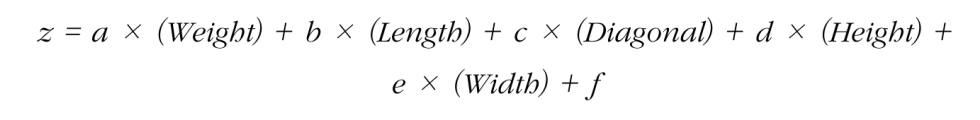

* 여기에서 a, b, c, d, e는 가중치 혹은 계수입니다. 
* 특성은 늘어났지만 다중 회귀를 위한 선형 방정식으로 볼수 있습니다. 
* z는 어떤 값도 가능합니다. 하지만 확률이 되려면 0 ~ 1 사이 값이 되어야 합니다. 
* z가 아주 큰 음수일 때 0이 되고, z가 아주 큰 양수일 때 1이 되도록 시그모이드 함수(sigmoid function) 또는 로지스틱 함수(logstic function)을 사용하면 가능합니다

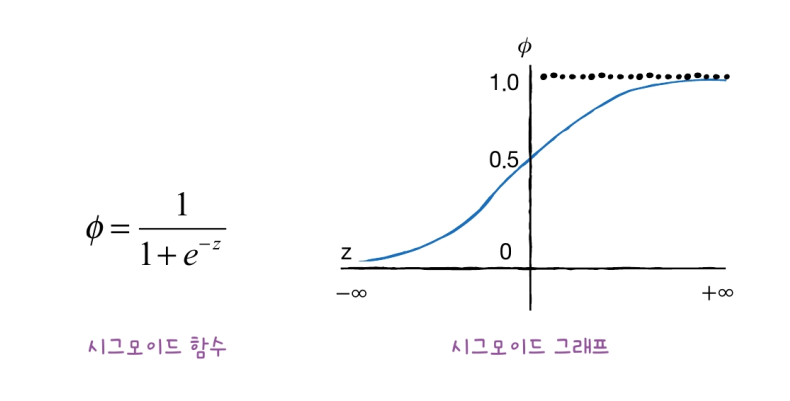

In [ ]:
e -> 2.71828182844590...................

* 왼쪽의 식이 시그모이드 함수입니다. 
* 선형 방정식의 출력 z의 음수를 사용해 자연 상수 e를 거듭제곱하고 1을 더한 값의 역수를 취합니다. 
* z가 무한하게 큰 음수일 경우 이 함수는 0에 가까워지고, z가 무한하게 큰 양수가 될 때는 1에 가까워집니다. 
* z가 0일 될 때는 0.5가 됩니다. z가 어떤 값이 되더라도 절대로 0 ~ 1 사이의 범위를 벗어날 수 없습니다. 

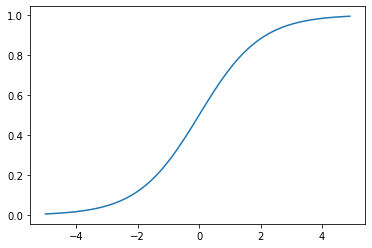

In [75]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1) # -5~5까지. 0.1 간격

phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.show()

### 로지스틱 회귀로 이진 분류 수행하기

* 넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있습니다. 
* 이를 불리언 인덱싱(boolean indexing)이라고 합니다. 

In [40]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


* 불리언 인덱싱을 사용하여 도미(Bream)와 빙어(Smelt)

In [41]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
# 도미와 빙어만 True 여서 train과 target 값엔 도미와 빙어밖에 없다

In [43]:
bream_smelt_indexes

array([ True, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False])

### LogisticRegression 클래스

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

* 훈련한 모델을 사용해 train_bream_smelt에 있는 처음 5개 샘플을 추출

In [45]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


* predict_proba() 메서드를 사용하여 5개의 확률을 출력해 보겠습니다. 

In [46]:
print(lr.predict_proba(train_bream_smelt[:5]))
# 각각 될 확률 ( 도미와 빙어 )

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


* 어떤 클래스 값이 양성인지 확인하겠습니다. 
* Bream -> 0
* Smelt -> 1

In [47]:
print(lr.classes_)

['Bream' 'Smelt']


* 로지스틱 회귀 모델이 학습한 방정식은 아래와 같습니다. 
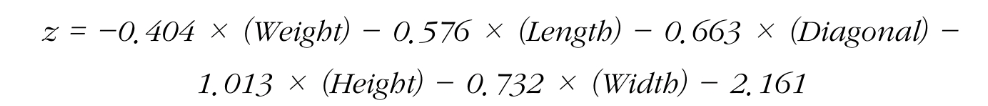

In [48]:
print(lr.coef_, lr.intercept_)
# lr.intercept_ = 절편 -> 바이어스

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


* decision_function() 메서드로 z 값을 출력해 보겠습니다. 

### z 값 수동

In [50]:
train_bream_smelt[0]

array([0.91965782, 0.60943175, 0.81041221, 1.85194896, 1.00075672])

In [53]:
lr.coef_

array([[-0.4037798 , -0.57620209, -0.66280298, -1.01290277, -0.73168947]])

In [56]:
rt = lr.coef_ * train_bream_smelt[0]
rt

array([[-0.37133925, -0.35115585, -0.53714363, -1.87584424, -0.73224315]])

In [57]:
rt.sum() + lr.intercept_

array([-6.02927744])

ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [49]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


* scipy 안에 expit() 함수는 시그모이드 함수입니다. 

In [59]:
from scipy.special import expit

print(expit(decisions)) # 시그모이드 함수 값

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [61]:
print(lr.predict_proba(train_bream_smelt[:5]))
#[[도미일 확률 , 빙어일 확률]]

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [63]:
lr.classes_ # 0, 1

array(['Bream', 'Smelt'], dtype=object)

In [62]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [77]:
print(train_bream_smelt[:5])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]]


### 로지스틱 회귀로 다중 분류 수행하기
* 다중 분류도 LogisticRegression 클래스를 기본적으로 반복적인 알고리즘을 사용합니다. 
* max_iter 매개변수에서 반복 횟수를 지정하며 기본값은 100입니다. 
* 반복 횟수가 부족하면 경고가 발생합니다. 

* LogisticRegression은 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제합니다. 
* 이런 규제를 L2 규제라고 합니다. 
* 릿지 회귀에서는 alpha 매개변수로 규제의 양을 조절했습니다. alpha가 커지면 규제도 커집니다. 
* LogisticRegression에서 규제를 제어하는 매개변수는 C입니다. 하지만 C는 alpha와 반대로 작을수록 규제가 커집니다. 
* C의 기본값은 1입니다. 여기서는 규제를 조금 완화하기 위해 20으로 늘리겠습니다.

In [64]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [65]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [66]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [67]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


* 다중 분류일 경우 선형 방정식은 어떤 모습일지 coef_와 intercept_의 크기를 출력하겠습니다. 

In [68]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [69]:
lr.coef_

array([[-1.48987946, -1.029909  ,  2.59435577,  7.70317372, -1.20033002],
       [ 0.19634499, -2.00943135, -3.7804282 ,  6.50475209, -1.9951452 ],
       [ 3.56251098,  6.34407205, -8.49003212, -5.75747082,  3.79323712],
       [-0.10502305,  3.60283367,  3.93064404, -3.61704957, -1.75100031],
       [-1.40029338, -6.07529102,  5.25937883, -0.87225719,  1.86066904],
       [-1.38534035,  1.49231096,  1.39234246, -5.67722609, -4.40100373],
       [ 0.62168026, -2.32458532, -0.90626079,  1.71607787,  3.6935731 ]])

In [70]:
lr.intercept_

array([-0.09215557, -0.2629502 ,  3.25077384, -0.14657998,  2.65465801,
       -6.78789398,  1.38414788])

* 다중 분류 클래스마다 z 값을 하나씩 계산합니다. 당연히 가장 높은 z 값을 출력하는 클래스가 예측 클래스가 됩니다. 
* 다중 분류는 소프트맥스(softmax) 함수를 사용하여 7개의 z값을 확률로 변환합니다. 
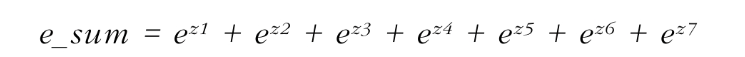

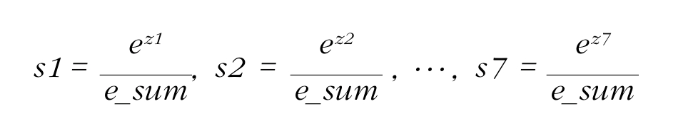

* decision_function() 메서드로 z1 ~ z7까지의 값을 구한 다음 소프트맥스 함수를 사용하여 확률로 변환하겠습니다. 

### 소프트맥스 별 7개

In [71]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


* scipy는 소프트맥스 함수도 제공합니다. 
* axis=1로 지정하여 각 행, 즉 각 샘플에 대해 소프트맥스를 계산합니다. 
* 만약 axis 매개변수를 지정하지 않으면 배열 전체에 대해 소프트맥스를 계산합니다. 

In [72]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
